<a href="https://colab.research.google.com/github/Samroman13/cifar10_conv2d_aws_streamlit/blob/main/Cifar10_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition from a dataset Cifar10

In [1]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [2]:
#Load cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train10.shape

(50000, 32, 32, 3)

In [4]:
# We define the class names in order
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

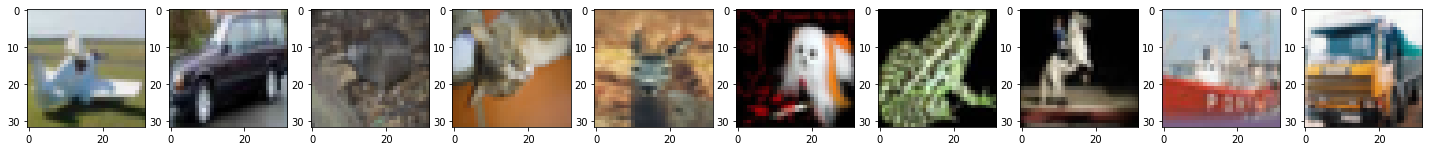

In [5]:
#For example, we output pictures for each class

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 
for i in range(10): 
  label_indexes = np.where(y_train10==i)[0] 
  index = random.choice(label_indexes) 
  img = x_train10[index] 
  axs[i].imshow(Image.fromarray(img)) 

plt.show() #Showing images

In [6]:
# Turning y_train and y_test networks into one hot encoding format
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [7]:
# let's look at the dimension of the samples before training
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


**Нейронная сеть**

Epoch 1/20
391/391 [==============================] - 26s 37ms/step - loss: 1.5921 - accuracy: 0.4221 - val_loss: 1.4326 - val_accuracy: 0.4952
Epoch 2/20
391/391 [==============================] - 14s 35ms/step - loss: 1.1323 - accuracy: 0.5926 - val_loss: 1.0423 - val_accuracy: 0.6384
Epoch 3/20
391/391 [==============================] - 14s 35ms/step - loss: 0.9426 - accuracy: 0.6668 - val_loss: 0.8837 - val_accuracy: 0.6916
Epoch 4/20
391/391 [==============================] - 13s 34ms/step - loss: 0.8338 - accuracy: 0.7028 - val_loss: 0.7331 - val_accuracy: 0.7428
Epoch 5/20
391/391 [==============================] - 14s 35ms/step - loss: 0.7568 - accuracy: 0.7342 - val_loss: 0.7552 - val_accuracy: 0.7382
Epoch 6/20
391/391 [==============================] - 14s 35ms/step - loss: 0.6978 - accuracy: 0.7538 - val_loss: 0.7088 - val_accuracy: 0.7568
Epoch 7/20
391/391 [==============================] - 14s 35ms/step - loss: 0.6506 - accuracy: 0.7722 - val_loss: 0.6270 - val_accuracy:

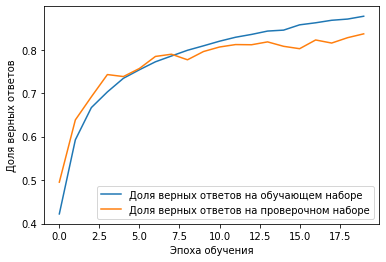

In [8]:
#creating batch_size
batch_size = 128 

#Creating a Sequential model
model = Sequential()
# Batch Normalization layer
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# The first layer of the subsample
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer Dropout
model.add(Dropout(0.25))

#Batch Normalization layer
model.add(BatchNormalization())
# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The second layer of the subsample
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer Dropout
model.add(Dropout(0.25))

# Batch Normalization layer
model.add(BatchNormalization())
# The fifth convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Sixth convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#The third layer of the subsample
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer Dropout
model.add(Dropout(0.25))

# Data transformation layer from 2D representation to line
model.add(Flatten())
#  Dense layer for classification
model.add(Dense(512, activation='relu'))
# Regularization layer Dropout
model.add(Dropout(0.25))
# Output Dense layer
model.add(Dense(10, activation='softmax'))

# Compile network
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# We train the network on data cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Displaying the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Determining images from a test sample**

In [68]:
# We recognize all test images
prediction = model.predict(x_test10)

In [11]:
# save/restore the entire model
from tensorflow.keras.models import load_model
model.save('/content/model_cf10') # save model
model = load_model('/content/model_cf10') # load model

INFO:tensorflow:Assets written to: /content/model_cf10/assets


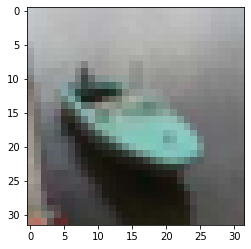

Network Output:  [4.0850847e-04 4.3693766e-05 7.5535841e-06 8.4785404e-07 2.0841789e-04
 5.3836864e-08 5.4808256e-06 1.8055255e-08 9.9932230e-01 3.0574531e-06]
Recognized image:  8
The correct answer:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Recognized braz in the picture:  ship


In [69]:
# We randomly choose a number
n = np.random.randint(x_test10.shape[0])

# We display a picture on the screen
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

# We display the results on the screen
print("Network Output: ", prediction[n])
print("Recognized image: ", np.argmax(prediction[n]))
print("The correct answer: ", y_test10[n])
print("Recognized braz in the picture: ", classes[np.argmax(prediction[n])])

In [15]:
# Identifying photos from the Internet
!unzip '/content/drive/MyDrive/Cifar_10/image.zip' 

Archive:  /content/drive/MyDrive/Cifar_10/image.zip
   creating: image/
  inflating: image/airplane.jpg      
  inflating: image/bird.jpg          
  inflating: image/car.jpg           
  inflating: image/cat.jpg           
  inflating: image/deer.jpg          
  inflating: image/dog.jpg           
  inflating: image/frog.jpg          
  inflating: image/horse.jpg         
  inflating: image/ship.jpg          
  inflating: image/truck.jpg         


In [16]:
#For example, we output pictures for each class

xTestReal10 = []
yTestReal10 = [] 

for i in classes: # We go through classes from 0 to 9
  img_path = 'image/' + str(i) + '.jpg' 
 #Loading the image by changing its size to the size of the input array of the neural network
 #In other words, we adjust the image to the size of the images on which the network was trained
 #Adding an image to the selection
  xTestReal10.append(np.asarray(image.load_img(img_path, grayscale=False, target_size=(32, 32)))) 
  yTestReal10.append(i) # Add class numbers to yTestReal10

xTestReal10 = np.array(xTestReal10) 
yTestReal10 = np.array(yTestReal10)

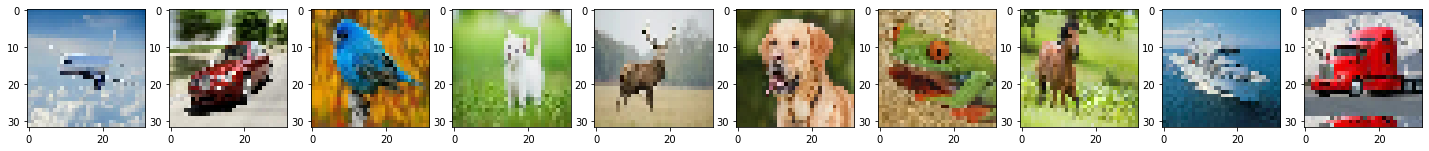

In [17]:
# let's display images of each class

fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10): 
  axs[i].imshow(Image.fromarray(xTestReal10[i]).convert('RGB')) 
plt.show() 

In [18]:
xTestReal10[0].shape #Let's look at the size of the array to make sure that everything was done correctly

(32, 32, 3)

In [75]:
prediction = model.predict(xTestReal10) # Classify each image
for i in range(10): 
  print("Recognized image:", classes[np.argmax(prediction[i])])
  print('The correct answer:', yTestReal10[i])
  print()

Recognized image: airplane
The correct answer: airplane

Recognized image: car
The correct answer: car

Recognized image: bird
The correct answer: bird

Recognized image: dog
The correct answer: cat

Recognized image: deer
The correct answer: deer

Recognized image: dog
The correct answer: dog

Recognized image: bird
The correct answer: frog

Recognized image: dog
The correct answer: horse

Recognized image: ship
The correct answer: ship

Recognized image: truck
The correct answer: truck



In [77]:
'''Let's create a program file with the code for:
initialization of the model;
loading weights;
the model works in recognition mode;
pre- and post-processing of images.'''

predict_file = '''

from tensorflow.keras.models import load_model
MODEL_NAME =   'model_cf10.h5'
import numpy as np
from PIL import Image 
model = load_model(MODEL_NAME)                                              
INPUT_SHAPE = (32, 32, 3)
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def process(image_file):
    
    image = Image.open(image_file)  # Opening the processed file
    resized_image = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0]))          # Resizing the image according to the network input
    array = np.array(resized_image)[..., :3][np.newaxis, ..., np.newaxis]   # Adjusting the tensor shape for feeding to the network
    predict = np.argmax(model.predict(array), axis=-1)
    predict_text = classes[np.argmax(predict)]
    

    return resized_image, predict_text                          # Return of the original thumbnail image, text description of the prediction
'''

with open('predict_img.py', 'w') as file:
    file.write(predict_file)

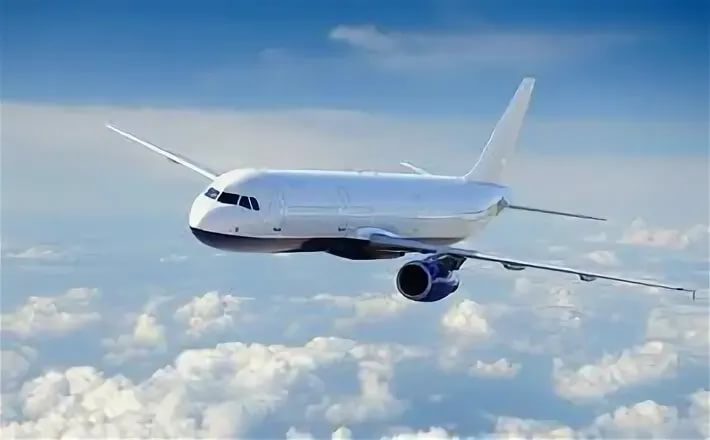

In [44]:
# Let's check the operation of predict_file
# Viewing the test image

from PIL import Image                                    

# Path to the image file
test_path = '/content/image/airplane.jpg'  
img = Image.open(test_path)

# Image output to the screen
display(img)   

In [71]:
# importing the created module
import predict_img
import matplotlib.pyplot as plt

In [73]:
# Calling the process() function from the predict_img module, passing the path to the image of the aircraft
pred_img, pred_text,  = predict_img.process('/content/image/airplane.jpg')

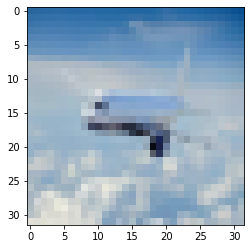

airplane


In [74]:
# let's deduce the operation of the function
plt.imshow(pred_img)
plt.show()
print(pred_text)

In [78]:
# application file (forms):
app_file = '''

import streamlit as st
from PIL import Image 
from segment import process

st.title('Cifar_10 demo')

image_file = st.file_uploader('Load an image', type=['png', 'jpg'])  # Adding a file loader

if not image_file is None:                                           # Block execution if an image is loaded
    col1, col2 = st.beta_columns(2)                                  # Creating 2 columns
    image = Image.open(image_file)                                   # Image opening
    pred_img, pred_text,  = process(image_file)                      # Image processing using a function implemented in another file
    col1.text('Source image')
    col1.image(image_file)                                           # Output in the first column of the original image
    col2.text(pred_text)                                             # Output of the text prediction of the model
    col2.image(pred_img)                                             # Output of the reduced source image to the second column
    
'''

with open('app.py', 'w') as file:
    file.write(app_file)

In [62]:
# Config fail Streamlit:
setup_file = '''

mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

'''

with open('setup.sh', 'w') as file:
    file.write(setup_file)

In [63]:
# comand file for launching the service:
proc_file = 'web: sh setup.sh && streamlit run app.py'

with open('Procfile', 'w') as file:
    file.write(proc_file)

In [64]:
# requirements file of required packages:
requirements_file = '''

streamlit==0.82.0
tensorflow-cpu==2.5.0

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [65]:
# Delete the extra files located in the current folder in Colab by default:
!rm -rf sample_data